In [ ]:
#import library yang diperlukan
import pandas as pd #untuk membaca dataset
import matplotlib.pyplot as plt #untuk membuat visualisasi data
from plotnine import * 
import plotnine #untuk menampilkan data
import numpy as np
from keras.layers import Dense, LSTM
import tensorflow as tf


In [ ]:
#upload file
from google.colab import files
files.upload()

Saving Mariam ulfa.xlsx to Mariam ulfa.xlsx


{'Mariam ulfa.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
#membaca data dari excel dengan library pandas dan mengecek 5 data teratas
df = pd.read_excel('Mariam ulfa.xlsx')
df.head()

,TYPE 1,USERNAME,JUMLAH
0,Positif,Yuni,1
1,Negatif,Yuni,0
2,Netral,Yuni,1
3,Positif,Latifatul Mujahidah,7
4,Negatif,Latifatul Mujahidah,1


In [ ]:
df.isnull().sum()

TYPE 1      0
USERNAME    0
JUMLAH      0
dtype: int64

In [ ]:
df.dtypes

TYPE 1      object
USERNAME    object
JUMLAH       int64
dtype: object

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


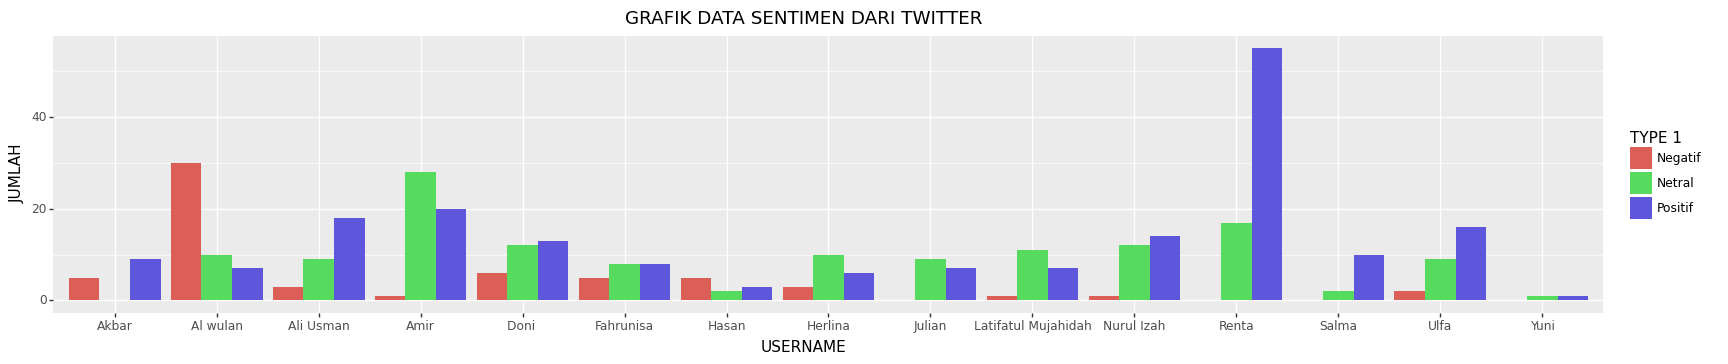

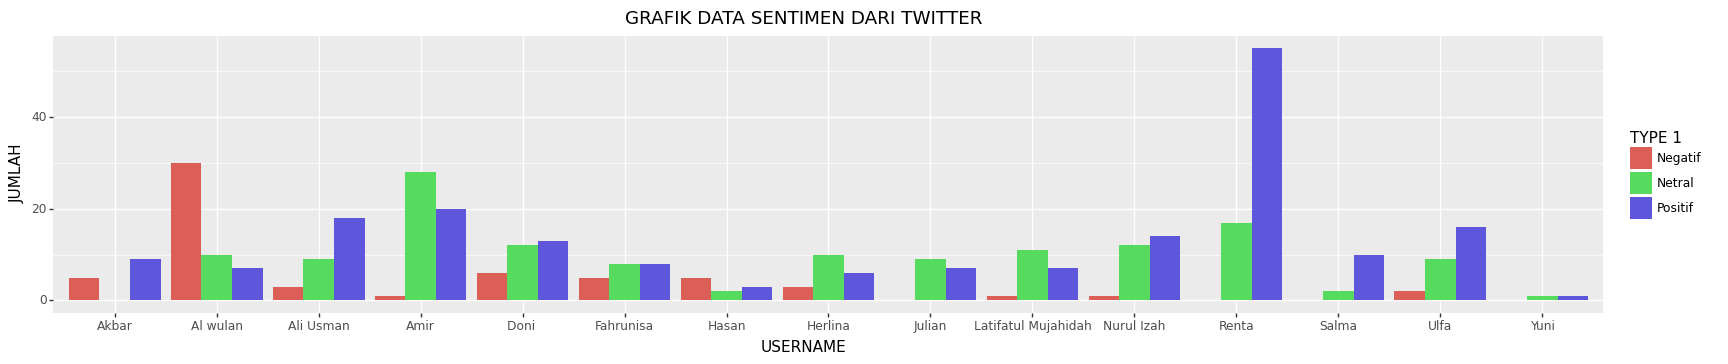

In [ ]:
Hasil = df['TYPE 1'].values
Jumlah = df['JUMLAH'].values
#visualisasi data dan menampilkannya
plotnine.options.figure_size=(20, 3.6)
(ggplot(data=df) + aes(x='USERNAME', fill='TYPE 1', y='JUMLAH')
+ geom_col(position='position_dodge')
+ labs(title='GRAFIK DATA SENTIMEN DARI TWITTER', x='USERNAME',
y='JUMLAH')
).draw()

In [ ]:
df = df.drop(columns=['USERNAME'])

In [ ]:
from sklearn.model_selection import train_test_split
Hasil_train, Jumlah_test, Jumlah_train, Hasil_test = train_test_split(Hasil, Jumlah, test_size=0.2)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')is not None and logs.get('mae') <= mae_terkecil):
      print("\nMAE dibawah ", mae_terkecil , ", train data diberhentikan !")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
train_set = windowed_dataset(Hasil_train, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


TypeError: ignored